<a href="https://colab.research.google.com/github/nedlecky/CSC485B/blob/main/CSC485_101_TempConverter_SimulatedRealWorldData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 485B Spring 2023
## Linear Regression with simulated real world data...
Do we like the performance??

In [1]:
import numpy as np

# Let's make some simulated data...
# Input in celsius between -50 and 150
# Output will be exact (1.8 tcelsius + 32) +/- 2 degrees random

# My test data: 100 ordered pairs (Tcelsius, Tfahrenheit) as (x[0],y[0]), (x[1],y[1], ...)
n=1 # 1 input
m=1 # 1 output
N=100 # 100 samples

import random
# We use regular old random functions as well as np.random...
# Let's seed both so we can be reproducible
random.seed(1)
np.random.seed(1)

x = np.random.rand(N) * 100 - 50 # This gives us random inputs from -50 to 150
y_exact = 1.8 * x + 32.0
y = y_exact + np.random.rand(N)*5.0 - 2.5


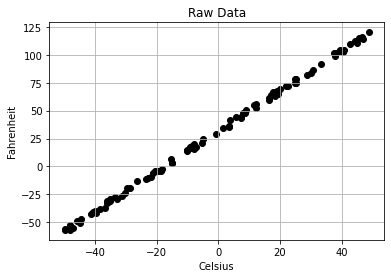

In [2]:
# Let's take a look at the sample data
import matplotlib.pyplot as plt

plt.scatter(x,y, color='black')

plt.title('Raw Data')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.grid()
plt.show()


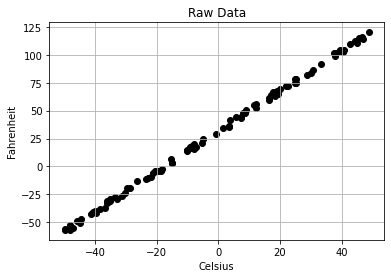

In [3]:
# For n inputs and m outputs with N examples... (Note here n=m=1 and N=2)
# We need X to be an Nxn matrix and Y to be an Nxm matrix
X = x.reshape(N,n)
Y = y.reshape(N,m)

# Just to show Matplotlib doesn't care about the shape!
plt.scatter(X,Y,color='black')

plt.title('Raw Data')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.grid()
plt.show()


Coefficients: [[1.799]]
Offsets: [31.922]
In other words, Tfahrenheit = [1.799] * Tcelsius + [31.922]
Y_pred.shape = (100, 1)
Mean squared error: 2.50
Mean absolute error: 1.41


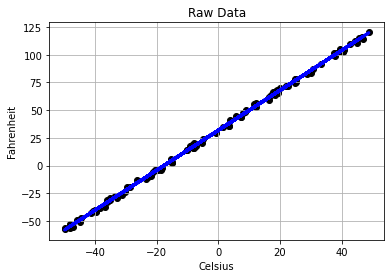

In [4]:
# Now let's train a linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X, Y)

np.set_printoptions(precision=3) # This seems to be necessary
print(f"Coefficients: {regr.coef_}")
print(f"Offsets: {regr.intercept_}")
print(f"In other words, Tfahrenheit = {regr.coef_[0]} * Tcelsius + {regr.intercept_}")

Y_pred = regr.predict(X)
print(f"Y_pred.shape = {Y_pred.shape}")
print(f"Mean squared error: {mean_squared_error(y, Y_pred):.2f}")
print(f"Mean absolute error: {mean_absolute_error(y, Y_pred):.2f}")


# Plot original and predicted
plt.scatter(X, Y, color="black")
plt.plot(X, Y_pred, color="blue", linewidth=3)
plt.title('Raw Data')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.grid()
plt.show()


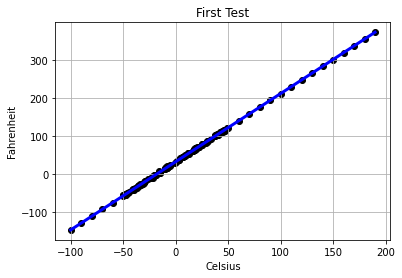

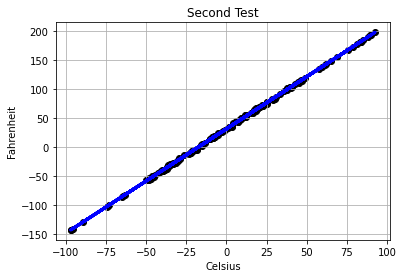

In [5]:
# And we could make a test dataset and it would (of course) work just fine
def test_inputs(X_test, title='Test Data'):
  Y_pred = regr.predict(X_test)

  # Plot original and predicted
  plt.scatter(X, Y, color="black")
  plt.scatter(X_test, Y_pred, color="black")
  plt.plot(X_test, Y_pred, color="blue", linewidth=3)
  plt.title(title)
  plt.xlabel('Celsius')
  plt.ylabel('Fahrenheit')
  plt.grid()
  plt.show()

# Regular test data
X_test = np.arange(-100,200,10)
test_inputs(X_test.reshape(-1,1), 'First Test')

# Some random test data
X_test = np.random.rand(50)*200-100
test_inputs(X_test.reshape(-1,1), 'Second Test')
